In [15]:
import pandas as pd

- 案例背景
  - 对APP下载和评分数据分析帮助App开发者获取和留存用户
  - 通过对应用商店的数据分析为开发人员提供可操作的意见
- 通过数据分析要解决的问题
  - 免费和收费的App都集中在哪些类别
  - 收费app的价格是如何分布的，不同类别的价格分布怎样
  - App文件的大小和价格以及用户评分之间是否有关
- 分析流程
  - 数据概况分析
    - 数据行/列数量 
    - 缺失值分布
  - 单变量分析
    - 数字型变量的描述指标（平均值，最小值，最大值，标准差等）
    - 类别型变量（多少个分类，各自占比）
  - 多变量分析
    - 按类别交叉对比
    - 变量之间的相关性分析
  - 可视化分析
    - 分布趋势（直方图）
    - 不同组差异（柱状图）
    - 相关性（散点图/热力图）

In [12]:
app_store=pd.read_csv('data/applestore.csv')
app_store.drop('Unnamed: 0',axis=1,inplace=True)
app_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   prime_genre       7197 non-null   object 
 7   sup_devices       7197 non-null   int64  
 8   ipadSc_urls       7197 non-null   int64  
 9   lang              7197 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 562.4+ KB


In [13]:
app_store.describe()

,id,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


In [14]:
app_store.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


In [23]:
app_store['size_mb']=app_store['size_bytes']/(1024*1024)

In [25]:
app_store.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

In [27]:
app_store['paid']=app_store['price'].apply(lambda x: 1 if x>0 else 0) 

In [30]:
app_store.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0


In [32]:
app_store.price.describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

In [33]:
group=[0,2,10,300]
labels=['<2',"<10",'<300']

In [36]:
app_store['price_new']=pd.cut(app_store['price'],bins=group,labels=labels,right=False)
app_store.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,price_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,1,<10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,0,<2
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,0,<2
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,0,<2
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,0,<2


In [38]:
app_store.groupby(['price_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<300,97.0,28.124021,38.886220,11.99,14.99,19.99,24.99,299.99


In [62]:
app_store=app_store[app_store['price']<=49.99]
app_store.rating_count_tot.describe()

count    7.190000e+03
mean     1.290515e+04
std      7.577526e+04
min      0.000000e+00
25%      2.725000e+01
50%      3.005000e+02
75%      2.796750e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Games'),
  Text(1, 0, 'Productivity'),
  Text(2, 0, 'Weather'),
  Text(3, 0, 'Shopping'),
  Text(4, 0, 'Reference'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'Music'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Travel'),
  Text(9, 0, 'Social Networking'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Business'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Entertainment'),
  Text(14, 0, 'Photo & Video'),
  Text(15, 0, 'Navigation'),
  Text(16, 0, 'Education'),
  Text(17, 0, 'Lifestyle'),
  Text(18, 0, 'Food & Drink'),
  Text(19, 0, 'News'),
  Text(20, 0, 'Book'),
  Text(21, 0, 'Medical'),
  Text(22, 0, 'Catalogs')])

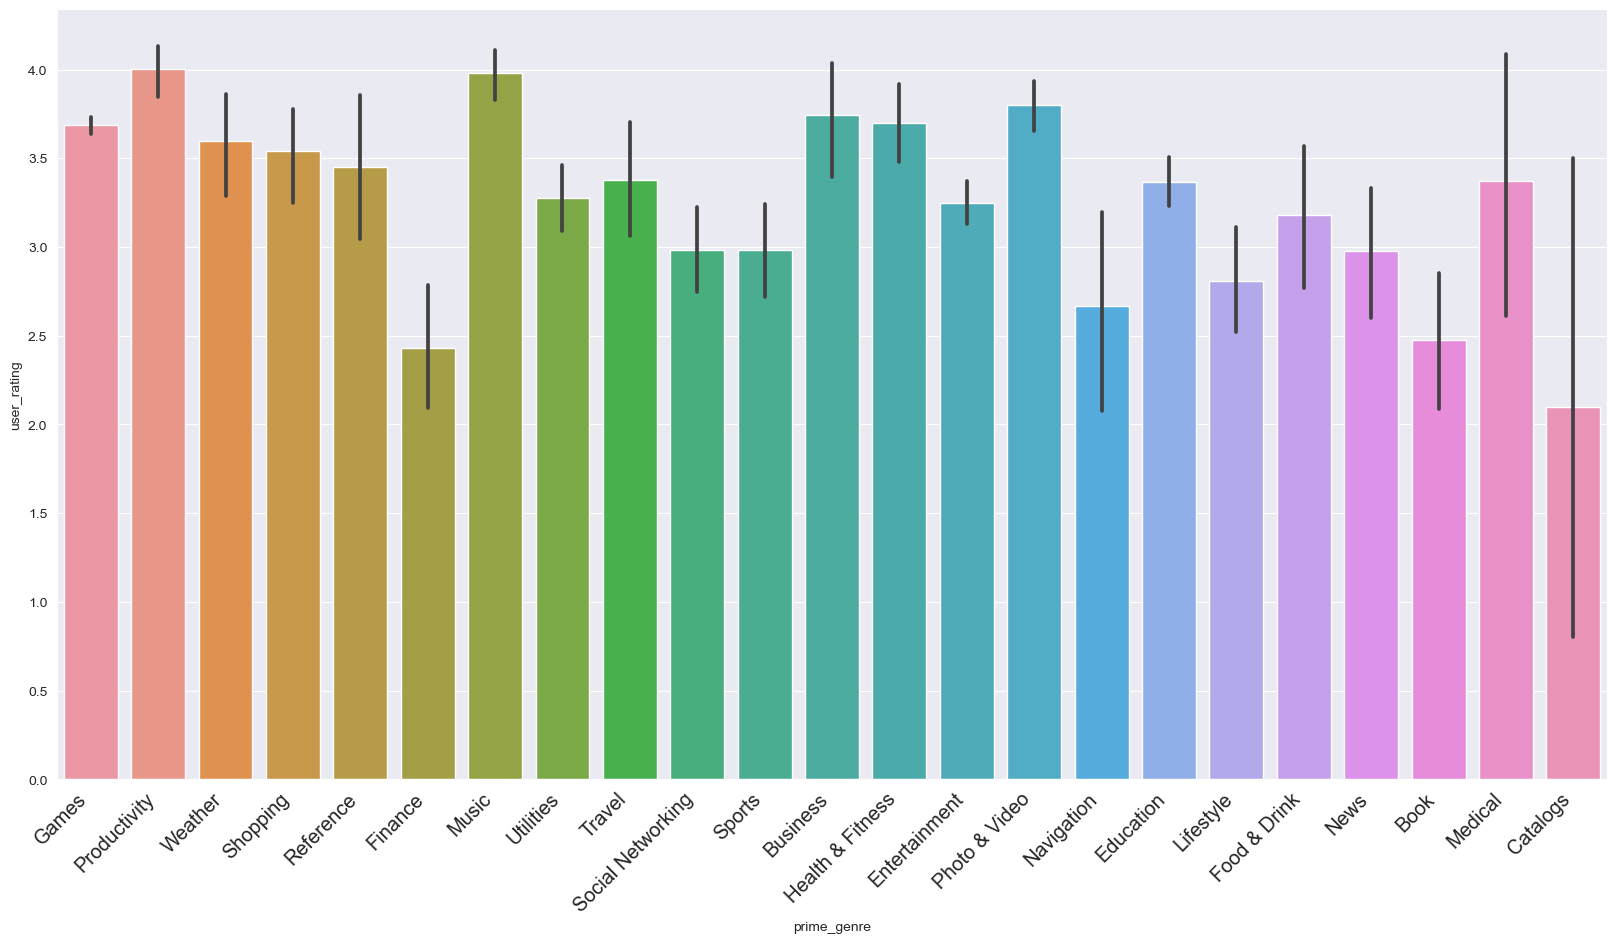

In [46]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=app_store,x='prime_genre',y='user_rating')
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')

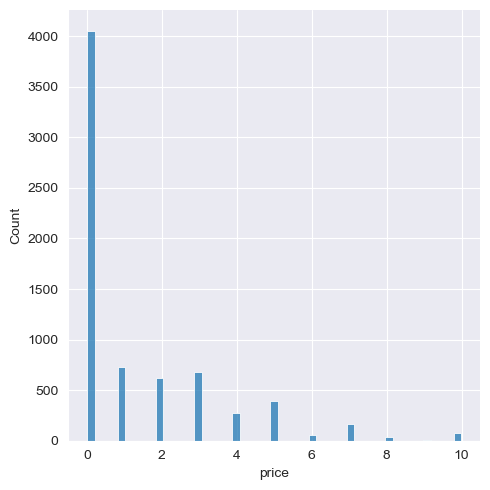

In [49]:
app_store1=app_store[app_store['price']<=9.99]
sns.displot(app_store1['price'])

<Axes: xlabel='price', ylabel='prime_genre'>

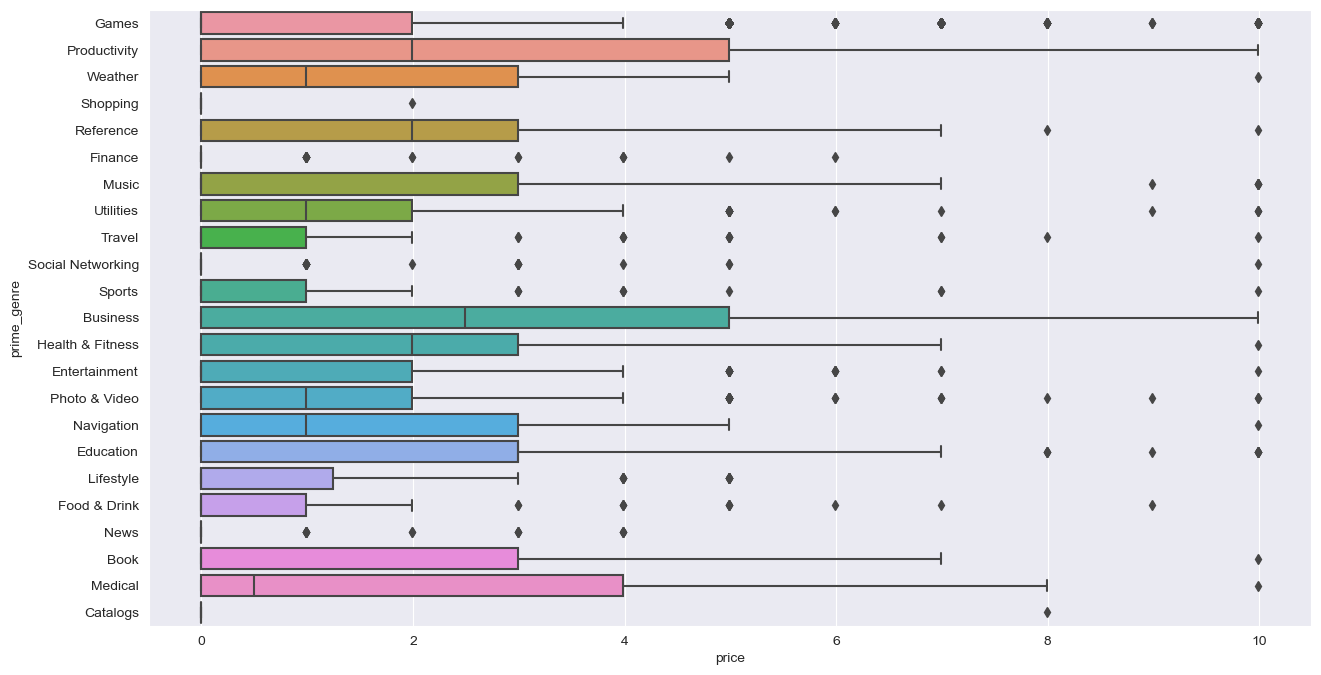

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(x='price',y='prime_genre',data=app_store1)

In [65]:
# top5=app_store.groupby('prime_genre').size().sort_values(ascending=False)[:5]
top5=app_store.groupby('prime_genre')['price'].count().sort_values(ascending=False)[:5].index.tolist()

In [67]:
app5=app_store[app_store['prime_genre'].isin(top5)]

  - 箱子的中间有一条线，代表了数据的中位数
  - 箱子的上下底，分别是数据的上四分位数（Q3）和下四分位数（Q1）
  - 箱体包含了50%的数据。因此，**箱子的高度在一定程度上反映了数据的波动程度**
  - 上下边缘则代表了该组数据的最大值和最小值
  - 有时候箱子外部会有一些点，可以理解为数据中的“**异常值**” 

<Axes: xlabel='price', ylabel='prime_genre'>

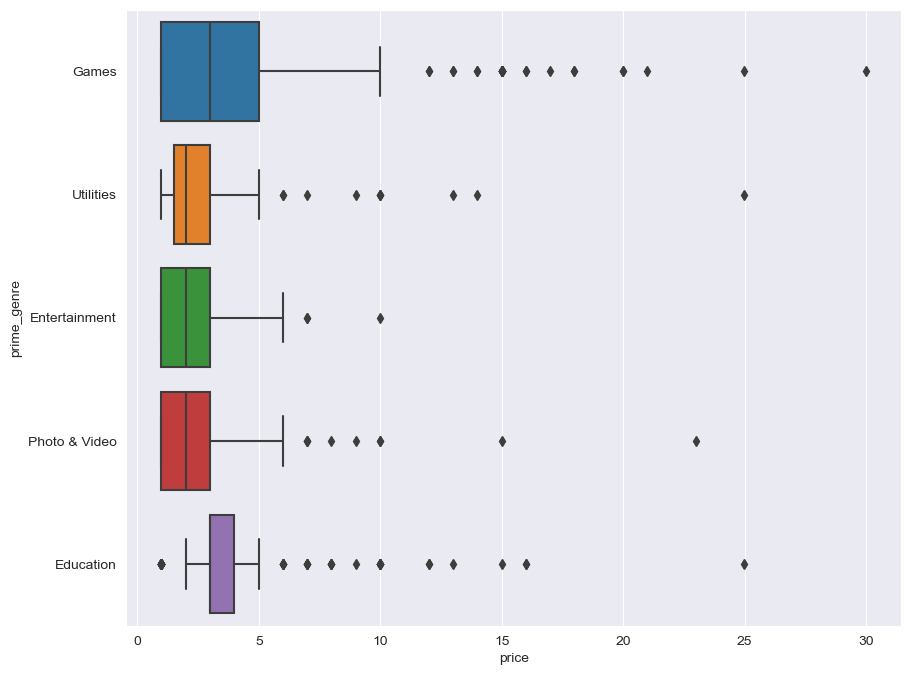

In [69]:
plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app5[app5['paid']==1])

<Axes: xlabel='price', ylabel='user_rating'>

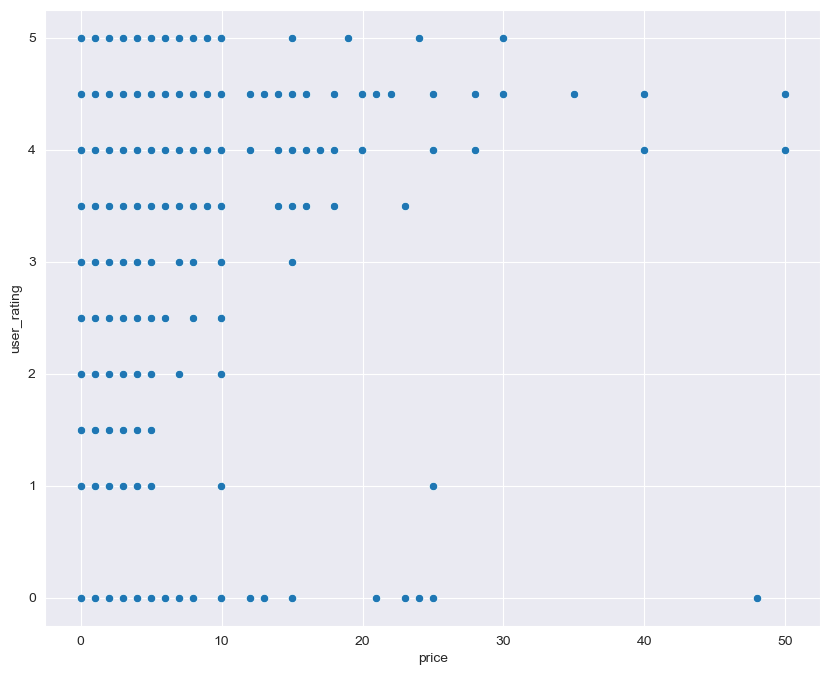

In [72]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x='price',y='user_rating',data=app_store)

<Axes: xlabel='prime_genre', ylabel='user_rating'>

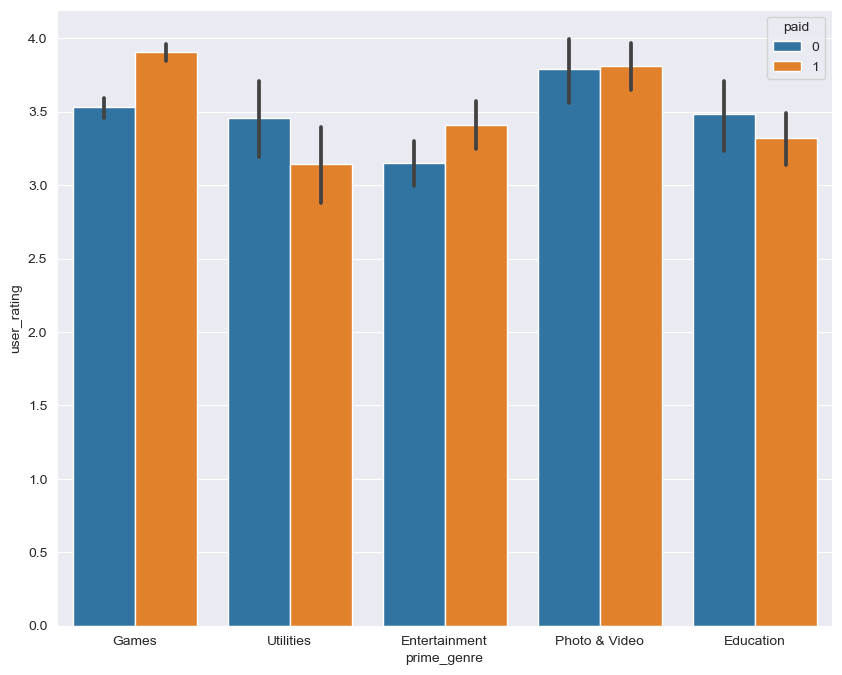

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x='prime_genre',y='user_rating',hue='paid',data=app5)

In [76]:
  q4=['user_rating','price','size_mb']
  app_store[q4].corr()

,user_rating,price,size_mb
user_rating,1.000000,0.073237,0.066160
price,0.073237,1.000000,0.314386
size_mb,0.066160,0.314386,1.000000


<Axes: >

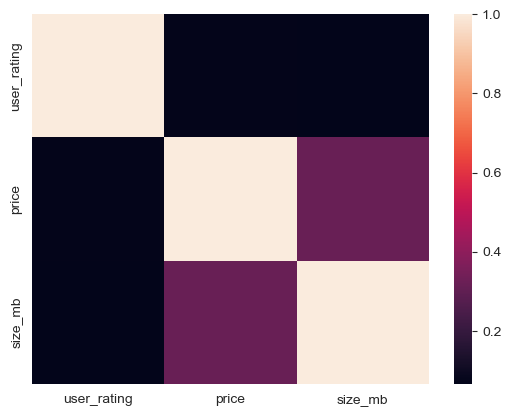

In [77]:
  sns.heatmap(app_store[q4].corr())